In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


# py -m pip install matplotlib

In [2]:
df_private_MTPL = pd.read_csv('df_private_mtpl2.txt', sep="\t")

In [3]:
df_private_MTPL['Vehicle_age'] = pd.to_numeric(df_private_MTPL['Vehicle_age'], errors='coerce')
df_private_MTPL['GWP'] = pd.to_numeric(df_private_MTPL['GWP'], errors='coerce')
df_private_MTPL['number_of_claims'] = pd.to_numeric(df_private_MTPL['number_of_claims'], errors='coerce')
df_private_MTPL['Client_Age'] = pd.to_numeric(df_private_MTPL['Client_Age'], errors='coerce')
df_private_MTPL['Policy_Duration'] = pd.to_numeric(df_private_MTPL['Policy_Duration'], errors='coerce')
df_private_MTPL['Years_of_driving'] = pd.to_numeric(df_private_MTPL['Years_of_driving'], errors='coerce')

df_private_MTPL['PRODUCT'] = pd.Categorical(df_private_MTPL['PRODUCT'])
df_private_MTPL['Duration'] = pd.Categorical(df_private_MTPL['Duration'])
df_private_MTPL['Make'] = pd.Categorical(df_private_MTPL['Make'])
df_private_MTPL['vehicle_type_group_mapped'] = pd.Categorical(df_private_MTPL['vehicle_type_group_mapped'])
df_private_MTPL['City'] = pd.Categorical(df_private_MTPL['City'])
df_private_MTPL['Churn'] = pd.Categorical(df_private_MTPL['Churn'])
df_private_MTPL['Renewal'] = pd.Categorical(df_private_MTPL['Renewal'])
df_private_MTPL['Gender'] = pd.Categorical(df_private_MTPL['Gender'])
df_private_MTPL['Channel'] = pd.Categorical(df_private_MTPL['Channel'])


In [4]:
df_private_MTPL2 = df_private_MTPL

numerical_columns = ['Vehicle_age', 'GWP', 'number_of_claims', 'Policy_Duration', 'Client_Age', 'Years_of_driving']

scaler = MinMaxScaler()
df_private_MTPL2[numerical_columns] = scaler.fit_transform(df_private_MTPL2[numerical_columns])

In [5]:
df_private_MTPL3 = df_private_MTPL2

categorical_columns = ['PRODUCT', 'Duration', 'Make', 'vehicle_type_group_mapped', 'Gender', 'City', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')

X_encoded = encoder.fit_transform(df_private_MTPL3[categorical_columns])

encoded_column_names = encoder.get_feature_names_out(categorical_columns)

df_encoded = pd.DataFrame(X_encoded, columns=encoded_column_names)

df_private_MTPL3 = pd.concat([df_private_MTPL3.drop(columns=categorical_columns), df_encoded], axis=1)

In [6]:
X = df_private_MTPL3.drop(columns=['Churn']) 
y = df_private_MTPL3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.7, random_state=42)

In [52]:
K = y_test.value_counts()
K

Churn
0    392212
1     31955
Name: count, dtype: int64

Accuracy: 0.979878208347184
F1: 0.8504808787204596
AUC: 0.9640695383555312


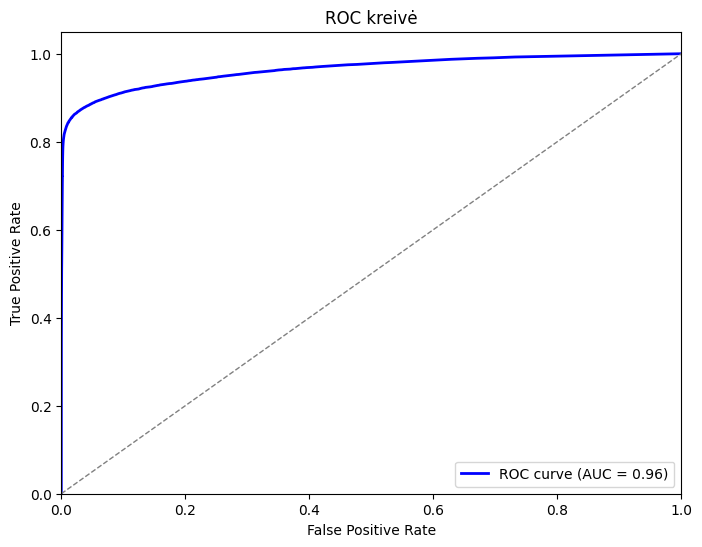

In [7]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=100,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=6,
    n_estimators=100,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()



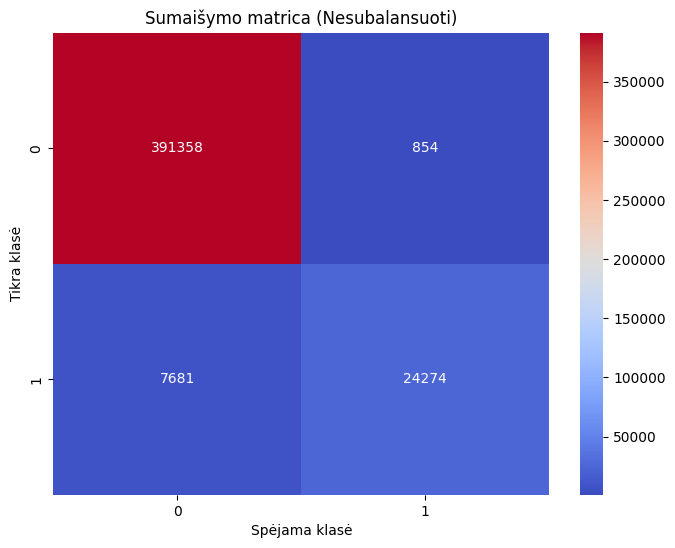

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Sumaišymo matrica (Nesubalansuoti)")
plt.ylabel('Tikra klasė')
plt.xlabel('Spėjama klasė')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9799
Precision: 0.9660
Recall: 0.7596
F1 Score: 0.8505


In [8]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')

X_train_enn = df_enn.drop('Churn', axis=1)  
y_train_enn = df_enn['Churn']              

X_train_ht_enn, X_test_ht_enn, y_train_ht_enn, y_test_ht_enn = train_test_split(X_train_enn, y_train_enn, stratify=y_train_enn, test_size=0.7, random_state=42)

In [53]:
K = y_train_enn.value_counts()
K

Churn
0    811730
1     74562
Name: count, dtype: int64

Accuracy: 0.9582900131316203
F1: 0.7129226974751737
AUC: 0.9115013280963397


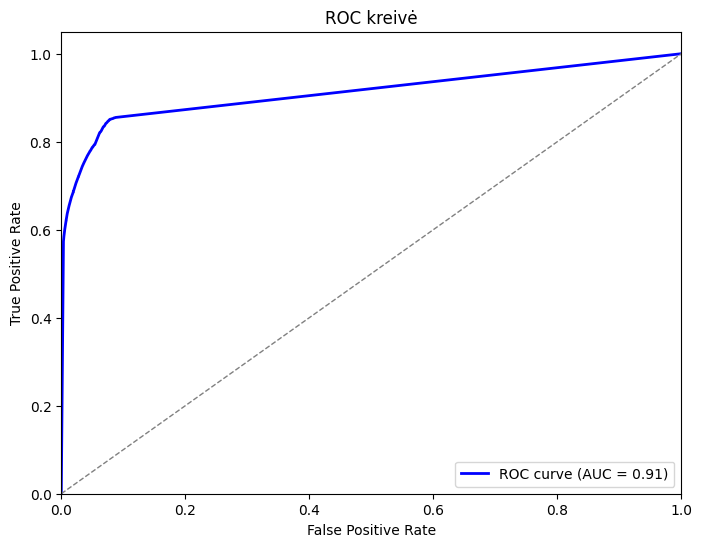

In [9]:
# Best Parameters found:
# {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 80, 'criterion': 'entropy'}
# Best cross-validation accuracy: 0.736
best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=80,
    max_features=None,
    min_samples_leaf=5,
    min_samples_split=4,
    n_estimators=200,
    random_state=42
)

best_model.fit(X_train_enn, y_train_enn)

y_pred_enn = best_model.predict(X_test)

accuracy_enn = accuracy_score(y_test, y_pred_enn)
print("Accuracy:", accuracy_enn)

f1_enn = f1_score(y_test, y_pred_enn)
print("F1:", f1_enn)

y_prob_enn = best_model.predict_proba(X_test)[:, 1]
fpr_enn, tpr_enn, thresholds_enn = roc_curve(y_test, y_prob_enn)
auc_score_enn = auc(fpr_enn, tpr_enn)
print("AUC:", auc_score_enn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_enn, tpr_enn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

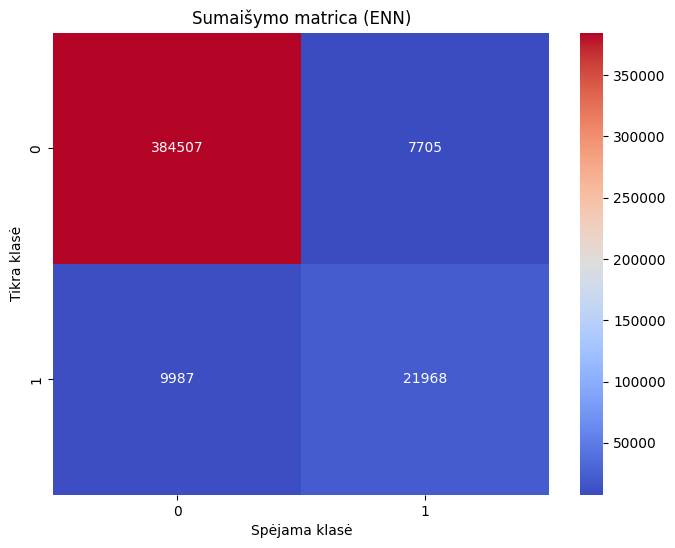

In [25]:
cm = confusion_matrix(y_test, y_pred_enn )

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Sumaišymo matrica (ENN)")
plt.ylabel('Tikra klasė')
plt.xlabel('Spėjama klasė')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_enn)
precision = precision_score(y_test, y_pred_enn)
recall = recall_score(y_test, y_pred_enn)
f1 = f1_score(y_test, y_pred_enn)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9583
Precision: 0.7403
Recall: 0.6875
F1 Score: 0.7129


In [ ]:
df_ros = pd.read_csv('train_data_ros.txt', sep='\t')

X_train_ros = df_ros.drop('Churn', axis=1)  
y_train_ros = df_ros['Churn']              

X_train_ht_ros, X_test_ht_ros, y_train_ht_ros, y_test_ht_ros = train_test_split(X_train_ros, y_train_ros, stratify=y_train_ros, test_size=0.7, random_state=42)

In [ ]:
Churn
0    811730
1     74562

In [ ]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=90,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_model.fit(X_train_ros, y_train_ros)

y_pred_ros = best_model.predict(X_test)

accuracy_ros = accuracy_score(y_test, y_pred_ros)
print("Accuracy:", accuracy_ros)

f1_ros = f1_score(y_test, y_pred_ros)
print("F1:", f1_ros)

y_prob_ros = best_model.predict_proba(X_test)[:, 1]
fpr_ros, tpr_ros, thresholds_ros = roc_curve(y_test, y_prob_ros)
auc_score_ros = auc(fpr_ros, tpr_ros)
print("AUC:", auc_score_ros)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ros, tpr_ros, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_ros)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [10]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')

X_train_sm = df_sm.drop('Churn', axis=1)  
y_train_sm = df_sm['Churn']              

X_train_ht_sm, X_test_ht_sm, y_train_ht_sm, y_test_ht_sm = train_test_split(X_train_sm, y_train_sm, stratify=y_train_sm, test_size=0.7, random_state=42)

In [54]:
k = y_train_sm.value_counts()
k

Churn
0    915159
1    915159
Name: count, dtype: int64

Accuracy: 0.9782467754445773
F1: 0.8526108972413463
AUC: 0.9719310271406758


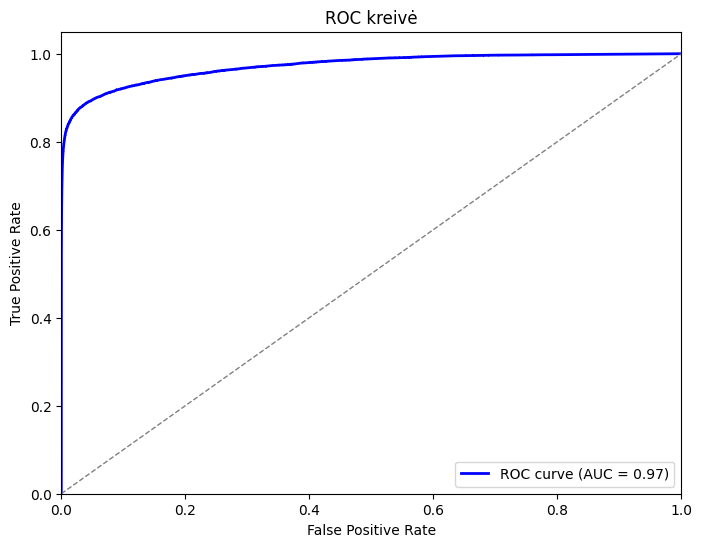

In [11]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=50,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=150,
    random_state=42,
)

best_model.fit(X_train_sm, y_train_sm)

y_pred_sm = best_model.predict(X_test)

accuracy_sm = accuracy_score(y_test, y_pred_sm)
print("Accuracy:", accuracy_sm)

f1_sm = f1_score(y_test, y_pred_sm)
print("F1:", f1_sm)

y_prob_sm = best_model.predict_proba(X_test)[:, 1]
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_prob_sm)
auc_score_sm = auc(fpr_sm, tpr_sm)
print("AUC:", auc_score_sm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sm, tpr_sm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_sm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

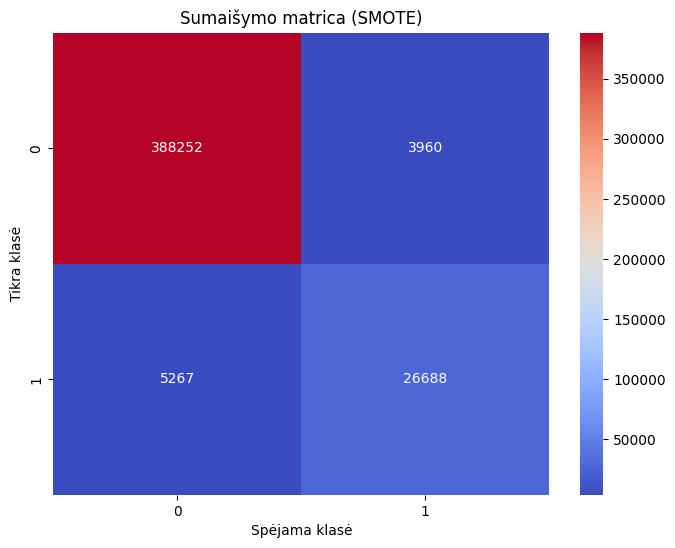

In [27]:
cm = confusion_matrix(y_test, y_pred_sm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Sumaišymo matrica (SMOTE)")
plt.ylabel('Tikra klasė')
plt.xlabel('Spėjama klasė')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_sm)
precision = precision_score(y_test, y_pred_sm)
recall = recall_score(y_test, y_pred_sm)
f1 = f1_score(y_test, y_pred_sm)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9782
Precision: 0.8708
Recall: 0.8352
F1 Score: 0.8526


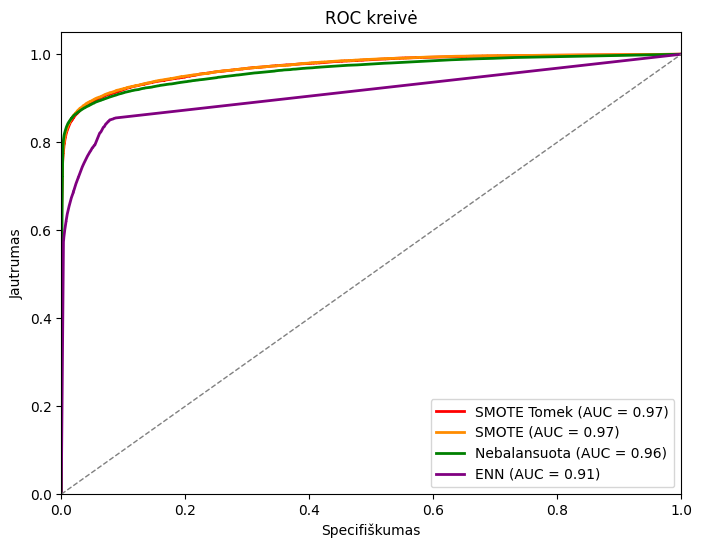

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='red', lw=2, label='SMOTE Tomek (AUC = %0.2f)' % auc_score_smt)
plt.plot(fpr_sm, tpr_sm, color='darkorange', lw=2, label='SMOTE (AUC = %0.2f)' % auc_score_sm)
plt.plot(fpr, tpr, color='green', lw=2, label='Nebalansuota (AUC = %0.2f)' % auc_score)
plt.plot(fpr_enn, tpr_enn, color='purple', lw=2, label='ENN (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [40]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')

X_train_smt = df_smt.drop('Churn', axis=1)  
y_train_smt = df_smt['Churn']              

X_train_ht_smt, X_test_ht_smt, y_train_ht_smt, y_test_ht_smt = train_test_split(X_train_smt, y_train_smt, stratify=y_train_smt, test_size=0.7, random_state=42)

In [55]:
k = y_train_smt.value_counts()
k

Churn
0    906779
1    906779
Name: count, dtype: int64

Accuracy: 0.9775088585392074
F1: 0.8476233069256325
AUC: 0.9711414222312589


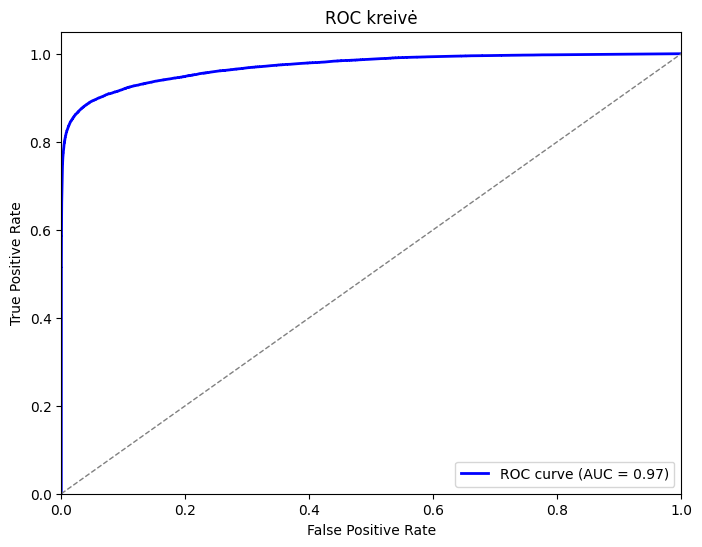

In [41]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=50,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=150,
    random_state=42,
)

best_model.fit(X_train_smt, y_train_smt)

y_pred_smt = best_model.predict(X_test)

accuracy_smt = accuracy_score(y_test, y_pred_smt)
print("Accuracy:", accuracy_smt)

f1_smt = f1_score(y_test, y_pred_smt)
print("F1:", f1_smt)

y_prob_smt = best_model.predict_proba(X_test)[:, 1]
fpr_smt, tpr_smt, thresholds_smt = roc_curve(y_test, y_prob_smt)
auc_score_smt = auc(fpr_smt, tpr_smt)
print("AUC:", auc_score_smt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_smt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

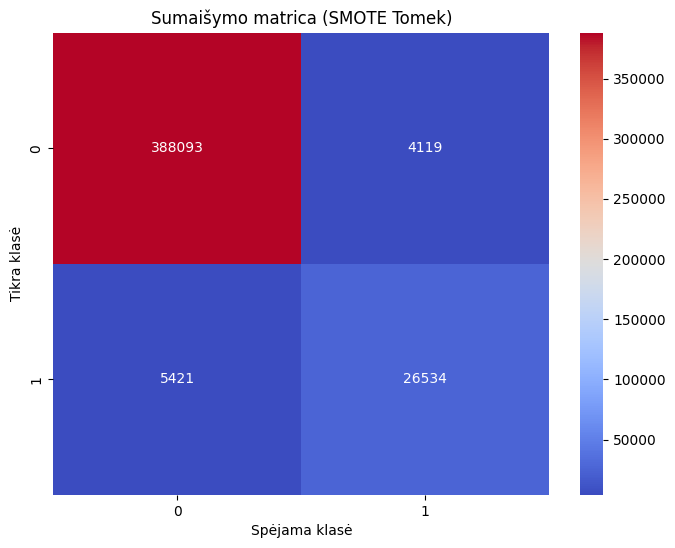

In [44]:
cm = confusion_matrix(y_test, y_pred_smt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Sumaišymo matrica (SMOTE Tomek)")
plt.ylabel('Tikra klasė')
plt.xlabel('Spėjama klasė')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_smt)
precision = precision_score(y_test, y_pred_smt)
recall = recall_score(y_test, y_pred_smt)
f1 = f1_score(y_test, y_pred_smt)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9775
Precision: 0.8656
Recall: 0.8304
F1 Score: 0.8476


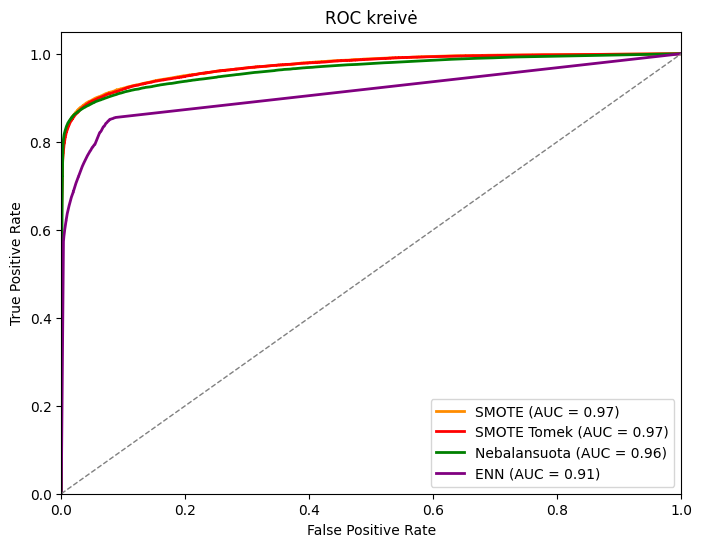

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sm, tpr_sm, color='darkorange', lw=2, label='SMOTE (AUC = %0.2f)' % auc_score_sm)
plt.plot(fpr_smt, tpr_smt, color='red', lw=2, label='SMOTE Tomek (AUC = %0.2f)' % auc_score_smt)
plt.plot(fpr, tpr, color='green', lw=2, label='Nebalansuota (AUC = %0.2f)' % auc_score)
plt.plot(fpr_enn, tpr_enn, color='purple', lw=2, label='ENN (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()